## An example workflow

In [1]:
#to use the full width of the browser window uncomment the code below and execute the cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from pyPoseidon.model import *
from pyPoseidon.dem import *
from pyPoseidon.meteo import *
import datetime
from pyPoseidon.utils.data import *


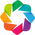

In [2]:
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs


hv.notebook_extension('bokeh')
#hv.notebook_extension('matplotlib')

### Define case

In [3]:
#define in a dictionary the properties of the model..
dic={'minlon':-35., # lat/lon window
     'maxlon':42.,
     'minlat':25.05,
     'maxlat':76.5,
     'solver':'d3d',
     'resolution':0.2, #grid resoltuion 
     'step':20, # step for output of map field in d3d
     'start_date':'2010-2-1',
     'time_frame':'1d',
#     'meteo':'hnms_oper',
     'meteo':'ecmwf_oper',
     'dem': 'gebco',
     'dpath' : '/Users/brey/DATA/GEBCO_2014_2D.nc',
#     'exec':'/Users/brey/DELFT3D/bin/lnx64/', #exec folder of solver 
     'ncores': 4 , #number of cores
     'rpath':'/Users/brey/Downloads/test/', #location of calc folder
     'conda_env':'mpi2' # optional conda env for running the solver
    }

#### Local operational ECMWF files

In [4]:
if 'time_frame' in dic.keys(): end_date= pd.to_datetime(dic['start_date']) + pd.to_timedelta(dic['time_frame'])
dic.update({'end_date':end_date.strftime(format='%Y-%m-%d')})

dr = pd.date_range(dic['start_date'],dic['end_date'], freq='12H')

#creating a sequence of folder from which we read the meteo.
PATH='/Volumes/data/projects/CRITECH/meteo/ECMWF/operational/'#Path to meteo files
folders = [datetime.datetime.strftime(x, '%Y%m%d.%H') for x in dr]
meteo = [PATH+'{:04d}/{:02d}/{:02d}/'.format(x.year,x.month,x.day)+datetime.datetime.strftime(x, '%Y%m%d.%H')+'.tropical_cyclone.grib' for x in dr]
meteo

['/Volumes/data/projects/CRITECH/meteo/ECMWF/operational/2010/02/01/20100201.00.tropical_cyclone.grib',
 '/Volumes/data/projects/CRITECH/meteo/ECMWF/operational/2010/02/01/20100201.12.tropical_cyclone.grib',
 '/Volumes/data/projects/CRITECH/meteo/ECMWF/operational/2010/02/02/20100202.00.tropical_cyclone.grib']

#### Local operational HNMS files

In [5]:
if 'time_frame' in dic.keys(): end_date= pd.to_datetime(dic['start_date']) + pd.to_timedelta(dic['time_frame'])
dic.update({'end_date':end_date.strftime(format='%Y-%m-%d')})

dr = pd.date_range(dic['start_date'],dic['end_date'], freq='12H')
dr

DatetimeIndex(['2010-02-01 00:00:00', '2010-02-01 12:00:00',
               '2010-02-02 00:00:00'],
              dtype='datetime64[ns]', freq='12H')

In [6]:
meteo = []
#creating a sequence of folder from which we read the meteo.
PATH='/Users/brey/Downloads/HNMS/01/'
files = glob.glob(PATH+'/E_JRC00*')
files.sort()
meteo= meteo + files[:12]

files = glob.glob(PATH+'/E_JRC12*')
files.sort()
meteo = meteo + files[:13]
meteo

['/Users/brey/Downloads/HNMS/01/E_JRC0000lf0000000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0001000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0002000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0003000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0004000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0005000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0006000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0007000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0008000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0009000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0010000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC0000lf0011000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC1212lf0000000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC1212lf0001000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC1212lf0002000020180101',
 '/Users/brey/Downloads/HNMS/01/E_JRC1212lf0003000020180101',
 '/Users

#### Local operational AM files

In [7]:
if 'time_frame' in dic.keys(): end_date= pd.to_datetime(dic['start_date']) + pd.to_timedelta(dic['time_frame'])
dic.update({'end_date':end_date.strftime(format='%Y-%m-%d')})

dr = pd.date_range(dic['start_date'],dic['end_date'], freq='12H')
dr

DatetimeIndex(['2010-02-01 00:00:00', '2010-02-01 12:00:00',
               '2010-02-02 00:00:00'],
              dtype='datetime64[ns]', freq='12H')

In [8]:
meteo = []
#creating a sequence of folder from which we read the meteo.
PATH='/Users/brey/Downloads/AM'
files = glob.glob(PATH+'/JRC_*_00_*')
files.sort()
meteo= meteo + files[:12]

files = glob.glob(PATH+'/JRC_*_12_*')
files.sort()
meteo = meteo + files[:13]
meteo

['/Users/brey/Downloads/AM/JRC_1403_00_000',
 '/Users/brey/Downloads/AM/JRC_1403_00_001',
 '/Users/brey/Downloads/AM/JRC_1403_00_002',
 '/Users/brey/Downloads/AM/JRC_1403_00_003',
 '/Users/brey/Downloads/AM/JRC_1403_00_004',
 '/Users/brey/Downloads/AM/JRC_1403_00_005',
 '/Users/brey/Downloads/AM/JRC_1403_00_006',
 '/Users/brey/Downloads/AM/JRC_1403_00_007',
 '/Users/brey/Downloads/AM/JRC_1403_00_008',
 '/Users/brey/Downloads/AM/JRC_1403_00_009',
 '/Users/brey/Downloads/AM/JRC_1403_00_010',
 '/Users/brey/Downloads/AM/JRC_1403_00_011',
 '/Users/brey/Downloads/AM/JRC_1403_12_000',
 '/Users/brey/Downloads/AM/JRC_1403_12_001',
 '/Users/brey/Downloads/AM/JRC_1403_12_002',
 '/Users/brey/Downloads/AM/JRC_1403_12_003',
 '/Users/brey/Downloads/AM/JRC_1403_12_004',
 '/Users/brey/Downloads/AM/JRC_1403_12_005',
 '/Users/brey/Downloads/AM/JRC_1403_12_006',
 '/Users/brey/Downloads/AM/JRC_1403_12_007',
 '/Users/brey/Downloads/AM/JRC_1403_12_008',
 '/Users/brey/Downloads/AM/JRC_1403_12_009',
 '/Users/b

#### update dictionary

In [5]:
dic.update({'mpaths':meteo,'ft1':0,'ft2':12})

## Initialize

In [6]:
#initialize a model
b = model(**dic)

### set it up

In [7]:
b.set() #set it up 


extracting dem from /Users/brey/DATA/GEBCO_2014_2D.nc

dem done

extracting meteo from /Volumes/data/projects/CRITECH/meteo/ECMWF/operational/2010/02/01/20100201.00.tropical_cyclone.grib


100%|██████████| 39/39 [00:13<00:00,  3.00it/s]


extracting meteo from /Volumes/data/projects/CRITECH/meteo/ECMWF/operational/2010/02/01/20100201.12.tropical_cyclone.grib



100%|██████████| 39/39 [00:13<00:00,  2.93it/s]


extracting meteo from /Volumes/data/projects/CRITECH/meteo/ECMWF/operational/2010/02/02/20100202.00.tropical_cyclone.grib



100%|██████████| 39/39 [00:13<00:00,  2.99it/s]


meteo done


#### Optional adjust the wet area based on a coastline shapefile

In [8]:
b.impl.dem.impl.adjust('/Users/brey/DATA/COASTLINES/naturalearth/coastline/ne_50m_coastline.shp')#,nc=20) 

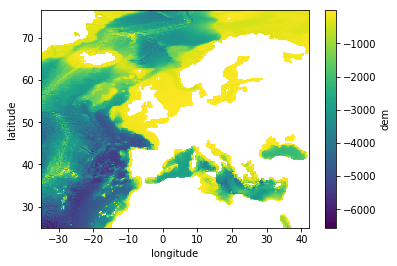

In [9]:
b.impl.dem.impl.fval.dem.plot() # test coverage

## Save to folder for execution 

In [10]:
#set the run by saving the files
b.output()

In [11]:
# save model info for further use
b.save()

In [12]:
# save all matrices for further use
#b.pickle(path=path)

### execute

In [13]:
#execute
b.run()

MPI process number 000 has host unknown and is running on processor dmapcgf.isferea.project
MPI process number 002 has host unknown and is running on processor dmapcgf.isferea.project
MPI process number 003 has host unknown and is running on processor dmapcgf.isferea.project
MPI process number 001 has host unknown and is running on processor dmapcgf.isferea.project
--------------------------------------------------------------------------------
       Deltares, FLOW2D3D Version 6.02.10.7072, Jan 29 2018, 12:55:29
       libflow2d3d.so entry Flow2D3D::Run
--------------------------------------------------------------------------------

Part I    - Initialisation Time Dep. Data module...    
            runid : d3d
Part II   - Creating intermediate files...             
Part III  - Initialisation of the Execution module...  
Part IV   - Reading complete MD-file...                     
Part V    - Initialisation & checking input...              
Part VI   - Initialisation & checking secon

  Time to finish   1m 35s,    7.2% completed, time steps left  1336
  Time to finish   1m 34s,    7.3% completed, time steps left  1335
  Time to finish   1m 34s,    7.4% completed, time steps left  1334
  Time to finish   1m 34s,    7.4% completed, time steps left  1333
  Time to finish   1m 34s,    7.5% completed, time steps left  1332
  Time to finish   1m 34s,    7.6% completed, time steps left  1331
  Time to finish   1m 33s,    7.6% completed, time steps left  1330
  Time to finish   1m 33s,    7.7% completed, time steps left  1329
  Time to finish   1m 33s,    7.8% completed, time steps left  1328
  Time to finish   1m 33s,    7.8% completed, time steps left  1327
  Time to finish   1m 33s,    7.9% completed, time steps left  1326
  Time to finish   1m 33s,    8.0% completed, time steps left  1325
  Time to finish   1m 32s,    8.1% completed, time steps left  1324
  Time to finish   1m 32s,    8.1% completed, time steps left  1323
  Time to finish   1m 32s,    8.2% completed, ti

  Time to finish   1m 21s,   15.6% completed, time steps left  1215
  Time to finish   1m 21s,   15.7% completed, time steps left  1214
  Time to finish   1m 21s,   15.8% completed, time steps left  1213
  Time to finish   1m 21s,   15.8% completed, time steps left  1212
  Time to finish   1m 21s,   15.9% completed, time steps left  1211
  Time to finish   1m 21s,   16.0% completed, time steps left  1210
  Time to finish   1m 21s,   16.0% completed, time steps left  1209
  Time to finish   1m 21s,   16.1% completed, time steps left  1208
  Time to finish   1m 20s,   16.2% completed, time steps left  1207
  Time to finish   1m 20s,   16.2% completed, time steps left  1206
  Time to finish   1m 20s,   16.3% completed, time steps left  1205
  Time to finish   1m 20s,   16.4% completed, time steps left  1204
  Time to finish   1m 20s,   16.5% completed, time steps left  1203
  Time to finish   1m 20s,   16.5% completed, time steps left  1202
  Time to finish   1m 20s,   16.6% completed, ti

  Time to finish   1m 11s,   24.0% completed, time steps left  1094
  Time to finish   1m 11s,   24.1% completed, time steps left  1093
  Time to finish   1m 11s,   24.2% completed, time steps left  1092
  Time to finish   1m 11s,   24.2% completed, time steps left  1091
  Time to finish   1m 11s,   24.3% completed, time steps left  1090
  Time to finish   1m 11s,   24.4% completed, time steps left  1089
  Time to finish   1m 10s,   24.4% completed, time steps left  1088
  Time to finish   1m 10s,   24.5% completed, time steps left  1087
  Time to finish   1m 10s,   24.6% completed, time steps left  1086
  Time to finish   1m 10s,   24.7% completed, time steps left  1085
  Time to finish   1m 10s,   24.7% completed, time steps left  1084
  Time to finish   1m 10s,   24.8% completed, time steps left  1083
  Time to finish   1m 10s,   24.9% completed, time steps left  1082
  Time to finish   1m 10s,   24.9% completed, time steps left  1081
  Time to finish   1m 10s,   25.0% completed, ti

  Time to finish   1m  2s,   32.4% completed, time steps left  973
  Time to finish   1m  2s,   32.5% completed, time steps left  972
  Time to finish   1m  2s,   32.6% completed, time steps left  971
  Time to finish   1m  2s,   32.6% completed, time steps left  970
  Time to finish   1m  2s,   32.7% completed, time steps left  969
  Time to finish   1m  2s,   32.8% completed, time steps left  968
  Time to finish   1m  2s,   32.8% completed, time steps left  967
  Time to finish   1m  2s,   32.9% completed, time steps left  966
  Time to finish   1m  2s,   33.0% completed, time steps left  965
  Time to finish   1m  2s,   33.1% completed, time steps left  964
  Time to finish   1m  2s,   33.1% completed, time steps left  963
  Time to finish   1m  2s,   33.2% completed, time steps left  962
  Time to finish   1m  2s,   33.3% completed, time steps left  961
  Time to finish   1m  1s,   33.3% completed, time steps left  960
  Time to finish   1m  1s,   33.4% completed, time steps left 

  Time to finish  54s,   41.4% completed, time steps left  844
  Time to finish  54s,   41.5% completed, time steps left  843
  Time to finish  54s,   41.5% completed, time steps left  842
  Time to finish  53s,   41.6% completed, time steps left  841
  Time to finish  53s,   41.7% completed, time steps left  840
  Time to finish  53s,   41.7% completed, time steps left  839
  Time to finish  53s,   41.8% completed, time steps left  838
  Time to finish  53s,   41.9% completed, time steps left  837
  Time to finish  53s,   41.9% completed, time steps left  836
  Time to finish  53s,   42.0% completed, time steps left  835
  Time to finish  53s,   42.1% completed, time steps left  834
  Time to finish  53s,   42.2% completed, time steps left  833
  Time to finish  53s,   42.2% completed, time steps left  832
  Time to finish  53s,   42.3% completed, time steps left  831
  Time to finish  53s,   42.4% completed, time steps left  830
  Time to finish  53s,   42.4% completed, time steps le

  Time to finish  45s,   50.5% completed, time steps left  713
  Time to finish  45s,   50.6% completed, time steps left  712
  Time to finish  45s,   50.6% completed, time steps left  711
  Time to finish  45s,   50.7% completed, time steps left  710
  Time to finish  45s,   50.8% completed, time steps left  709
  Time to finish  45s,   50.8% completed, time steps left  708
  Time to finish  45s,   50.9% completed, time steps left  707
  Time to finish  45s,   51.0% completed, time steps left  706
  Time to finish  45s,   51.0% completed, time steps left  705
  Time to finish  45s,   51.1% completed, time steps left  704
  Time to finish  44s,   51.2% completed, time steps left  703
  Time to finish  44s,   51.2% completed, time steps left  702
  Time to finish  44s,   51.3% completed, time steps left  701
  Time to finish  44s,   51.4% completed, time steps left  700
  Time to finish  44s,   51.5% completed, time steps left  699
  Time to finish  44s,   51.5% completed, time steps le

  Time to finish  37s,   59.6% completed, time steps left  582
  Time to finish  37s,   59.7% completed, time steps left  581
  Time to finish  37s,   59.7% completed, time steps left  580
  Time to finish  37s,   59.8% completed, time steps left  579
  Time to finish  36s,   59.9% completed, time steps left  578
  Time to finish  36s,   59.9% completed, time steps left  577
  Time to finish  36s,   60.0% completed, time steps left  576
  Time to finish  36s,   60.1% completed, time steps left  575
  Time to finish  36s,   60.1% completed, time steps left  574
  Time to finish  36s,   60.2% completed, time steps left  573
  Time to finish  36s,   60.3% completed, time steps left  572
  Time to finish  36s,   60.3% completed, time steps left  571
  Time to finish  36s,   60.4% completed, time steps left  570
  Time to finish  36s,   60.5% completed, time steps left  569
  Time to finish  36s,   60.6% completed, time steps left  568
  Time to finish  36s,   60.6% completed, time steps le

  Time to finish  28s,   68.7% completed, time steps left  451
  Time to finish  28s,   68.8% completed, time steps left  450
  Time to finish  28s,   68.8% completed, time steps left  449
  Time to finish  28s,   68.9% completed, time steps left  448
  Time to finish  28s,   69.0% completed, time steps left  447
  Time to finish  28s,   69.0% completed, time steps left  446
  Time to finish  28s,   69.1% completed, time steps left  445
  Time to finish  28s,   69.2% completed, time steps left  444
  Time to finish  28s,   69.2% completed, time steps left  443
  Time to finish  28s,   69.3% completed, time steps left  442
  Time to finish  28s,   69.4% completed, time steps left  441
  Time to finish  28s,   69.4% completed, time steps left  440
  Time to finish  28s,   69.5% completed, time steps left  439
  Time to finish  28s,   69.6% completed, time steps left  438
  Time to finish  28s,   69.7% completed, time steps left  437
  Time to finish  28s,   69.7% completed, time steps le

  Time to finish  20s,   77.8% completed, time steps left  320
  Time to finish  20s,   77.8% completed, time steps left  319
  Time to finish  20s,   77.9% completed, time steps left  318
  Time to finish  20s,   78.0% completed, time steps left  317
  Time to finish  20s,   78.1% completed, time steps left  316
  Time to finish  20s,   78.1% completed, time steps left  315
  Time to finish  20s,   78.2% completed, time steps left  314
  Time to finish  20s,   78.3% completed, time steps left  313
  Time to finish  20s,   78.3% completed, time steps left  312
  Time to finish  20s,   78.4% completed, time steps left  311
  Time to finish  20s,   78.5% completed, time steps left  310
  Time to finish  20s,   78.5% completed, time steps left  309
  Time to finish  20s,   78.6% completed, time steps left  308
  Time to finish  20s,   78.7% completed, time steps left  307
  Time to finish  19s,   78.8% completed, time steps left  306
  Time to finish  19s,   78.8% completed, time steps le

  Time to finish  12s,   86.9% completed, time steps left  189
  Time to finish  12s,   86.9% completed, time steps left  188
  Time to finish  12s,   87.0% completed, time steps left  187
  Time to finish  12s,   87.1% completed, time steps left  186
  Time to finish  12s,   87.2% completed, time steps left  185
  Time to finish  12s,   87.2% completed, time steps left  184
  Time to finish  12s,   87.3% completed, time steps left  183
  Time to finish  12s,   87.4% completed, time steps left  182
  Time to finish  12s,   87.4% completed, time steps left  181
  Time to finish  11s,   87.5% completed, time steps left  180
  Time to finish  11s,   87.6% completed, time steps left  179
  Time to finish  11s,   87.6% completed, time steps left  178
  Time to finish  11s,   87.7% completed, time steps left  177
  Time to finish  11s,   87.8% completed, time steps left  176
  Time to finish  11s,   87.8% completed, time steps left  175
  Time to finish  11s,   87.9% completed, time steps le

  Time to finish   4s,   96.0% completed, time steps left  58
  Time to finish   4s,   96.0% completed, time steps left  57
  Time to finish   4s,   96.1% completed, time steps left  56
  Time to finish   3s,   96.2% completed, time steps left  55
  Time to finish   3s,   96.2% completed, time steps left  54
  Time to finish   3s,   96.3% completed, time steps left  53
  Time to finish   3s,   96.4% completed, time steps left  52
  Time to finish   3s,   96.5% completed, time steps left  51
  Time to finish   3s,   96.5% completed, time steps left  50
  Time to finish   3s,   96.6% completed, time steps left  49
  Time to finish   3s,   96.7% completed, time steps left  48
  Time to finish   3s,   96.7% completed, time steps left  47
  Time to finish   3s,   96.8% completed, time steps left  46
  Time to finish   3s,   96.9% completed, time steps left  45
  Time to finish   3s,   96.9% completed, time steps left  44
  Time to finish   3s,   97.0% completed, time steps left  43
  Time t

## Analysis of output 

In [14]:
%matplotlib inline

In [253]:
otp = data([dic['rpath']])

In [254]:
otp.vars

<xarray.Dataset>
Dimensions:  (XU: 384, XV: 384, XZ: 384, YU: 256, YV: 256, YZ: 256, time: 73)
Coordinates:
  * YU       (YU) float32 25.2508 25.4516 25.6523 25.8531 26.0539 26.2547 ...
  * XZ       (XZ) float32 -34.8997 -34.6992 -34.4987 -34.2982 -34.0977 ...
  * YZ       (YZ) float32 25.1504 25.3512 25.552 25.7527 25.9535 26.1543 ...
  * time     (time) datetime64[ns] 2010-02-01 2010-02-01T00:19:59.999942656 ...
  * XU       (XU) float32 -34.8997 -34.6992 -34.4987 -34.2982 -34.0977 ...
  * XV       (XV) float32 -34.7995 -34.599 -34.3984 -34.1979 -33.9974 ...
  * YV       (YV) float32 25.1504 25.3512 25.552 25.7527 25.9535 26.1543 ...
Data variables:
    V1Z      (time, YZ, XZ) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    V1       (time, YV, XV) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    U1Z      (time, YZ, XZ) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PATM     (time, YZ, XZ) float32 101381.0 101358.0 101334.0 101310.0 ...
    S1       (time, YZ, 

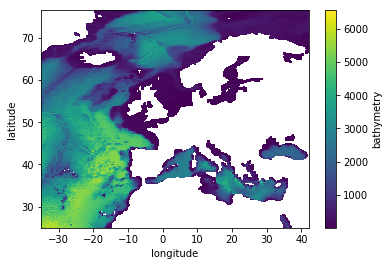

In [16]:
otp.dem.bathymetry.plot()

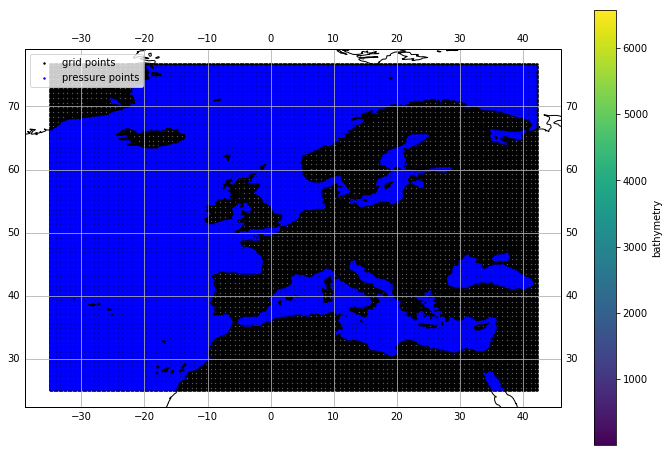

In [17]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ccrs.PlateCarree());

otp.dem.bathymetry.plot.pcolormesh('longitude', 'latitude', ax=ax);

gp = ax.scatter(otp.x, otp.y, s=2, color='k',  label='grid points', transform=ccrs.PlateCarree());

pp = ax.scatter(otp.xh, otp.yh, s=2, color='b', label='pressure points', transform=ccrs.PlateCarree());

ax.legend()

ax.coastlines('50m'); ax.gridlines(draw_labels=True);

### Visualize

In [ ]:
%%opts Image [width=650 height=450] (cmap='jet')
otp.hview('S1').to(hv.Image, ['XZ','YZ'], 'S1').hist()

In [19]:
g50 = gv.feature.coastline(plot=dict(scale='50m'), style=dict(linewidth=1.5))

In [ ]:
%%opts Image [colorbar=True width=650 height=450 toolbar="above", tools=['hover']] (cmap='viridis')
otp.gview('S1').to(gv.Image, ['XZ','YZ'],dynamic=True) * g50 * gf.borders()

In [ ]:
otp.frames(['S1'],title='SSH')

In [ ]:
otp.frames(['U1Z','V1Z'],title='Vel',scale=.1)

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


## Observation points / Validation

In [250]:
otp.obs.locations

,ID,Name,Group,Latency,Status,Details,Last Date,Max. Time,Min. Time,lat,lon,status
0,2576,Denmark -Hunderstend,DMI,11m,NaN,Details,09 Apr 2018 11:30,28 Aug 2017 10:10,01 Jan 2010 00:05,55.966,11.843,Active
1,1044,Tamosy Large Panel (Press),TAD,11m,NaN,Details,20 Jun 2030 05:01,05 Aug 2062 21:01,11 Jan 2000 00:03,46.500,8.617,Active
2,1043,Tamosy Large Panel (Temp),TAD,0m,NaN,Details,20 Jun 2030 05:01,30 May 2070 00:26,11 Jan 2000 00:03,45.756,8.617,Active
3,894,Denmark - Hirtshals,TD UNESCO,1h 1m,NaN,Details,09 Apr 2018 10:40,09 Apr 2018 10:40,31 Dec 2009 00:10,57.600,9.970,Active
4,1284,France - Brest,TD UNESCO,58m,NaN,Details,09 Apr 2018 10:42,09 Apr 2018 10:42,01 Jan 2010 00:01,48.380,-4.500,Active
5,1444,France - Calais,TD UNESCO,58m,NaN,Details,09 Apr 2018 10:42,09 Apr 2018 10:42,01 Jan 2010 00:01,50.969,1.868,Active
6,1289,France - Cherbourg,TD UNESCO,58m,NaN,Details,09 Apr 2018 10:42,09 Apr 2018 10:42,01 Jan 2010 00:01,49.650,-1.630,Active
7,1511,Germany - Helgoland Binnenhafen,TD UNESCO,46m,NaN,Details,09 Apr 2018 10:55,09 Apr 2018 10:55,01 Jan 2005 00:01,54.176,7.891,Active
8,1703,Norway - Tregde,TD UNESCO,41m,NaN,Details,09 Apr 2018 11:00,09 Apr 2018 09:00,01 Jan 2010 00:10,58.000,7.567,Active
9,831,Portugal - Cascais,TD UNESCO,4h 49m,NaN,Details,09 Apr 2018 06:51,09 Apr 2018 06:51,01 Jan 2010 00:04,38.693,-9.000,Active


In [251]:
# Get with index number
p = otp.obs.iloc(11)
p.head()

,Total Sea Level,Tide,Storm Surge
time,,,
2010-02-01 00:00:00,9.804,9.868,-0.064
2010-02-01 00:05:00,9.807,9.871,-0.064
2010-02-01 00:15:00,9.812,9.878,-0.066
2010-02-01 00:25:00,9.818,9.885,-0.067
2010-02-01 00:35:00,9.825,9.894,-0.069


In [252]:
#get with Station Name  
p = otp.obs.loc('Sweden - GoteborgTorshamnen')
p.head()

,Total Sea Level,Tide,Storm Surge
time,,,
2010-02-01 00:00:00,9.804,9.868,-0.064
2010-02-01 00:05:00,9.807,9.871,-0.064
2010-02-01 00:15:00,9.812,9.878,-0.066
2010-02-01 00:25:00,9.818,9.885,-0.067
2010-02-01 00:35:00,9.825,9.894,-0.069


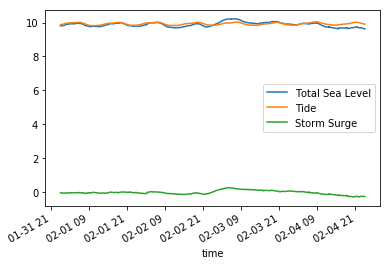

In [237]:
#plot
ax = p.plot()

### sample nearest point from simulation 

In [238]:
 plat,plon = otp.obs.locations.loc[16,['lat','lon']]

In [239]:
#ts = otp.vars.S1.sel(XZ=[lon], method='nearest', tolerance=5).sel(YZ=[lat], method='nearest', tolerance=5)
#ts = ts.squeeze().to_pandas()
#ts.head()

In [265]:
otp.info

{'atm': True,
 'conda_env': 'mpi2',
 'date': Timestamp('2010-02-01 00:00:00'),
 'dem': 'gebco',
 'dft': 1,
 'dpath': '/Users/brey/DATA/GEBCO_2014_2D.nc',
 'end_date': Timestamp('2010-02-02 00:00:00'),
 'ft1': 0,
 'ft2': 12,
 'maxlat': 76.5,
 'maxlon': 42.0,
 'meteo': 'ecmwf_oper',
 'minlat': 25.05,
 'minlon': -35.0,
 'mpaths': ['/Volumes/data/projects/CRITECH/meteo/ECMWF/operational/2010/02/01/20100201.00.tropical_cyclone.grib',
  '/Volumes/data/projects/CRITECH/meteo/ECMWF/operational/2010/02/01/20100201.12.tropical_cyclone.grib',
  '/Volumes/data/projects/CRITECH/meteo/ECMWF/operational/2010/02/02/20100202.00.tropical_cyclone.grib'],
 'ncores': 4,
 'resolution': 0.2,
 'rpath': '/Users/brey/Downloads/test/',
 'solver': 'd3d',
 'start_date': Timestamp('2010-02-01 00:00:00'),
 'step': 20,
 'tag': 'd3d',
 'tide': False,
 'time_frame': '1d'}

In [312]:
ts = point(lon=plon,lat=plat,data=otp)
ts.tseries(var='S1')

In [313]:
ts.S1

,S1
time,
2010-02-01 00:00:00.000000000,0.000000
2010-02-01 00:19:59.999942656,0.005009
2010-02-01 00:39:59.999885312,0.008057
2010-02-01 00:59:59.999959040,-0.014499
2010-02-01 01:19:59.999770624,0.014011
2010-02-01 01:40:00.000106496,-0.006355
2010-02-01 01:59:59.999918080,-0.080367
2010-02-01 02:20:00.000253952,-0.123412
2010-02-01 02:39:59.999541248,-0.063494


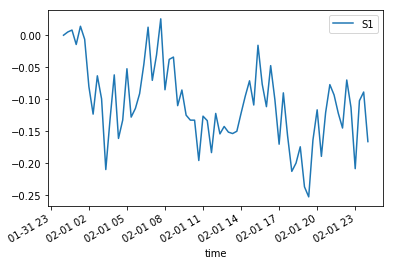

In [314]:
ts.S1.plot()

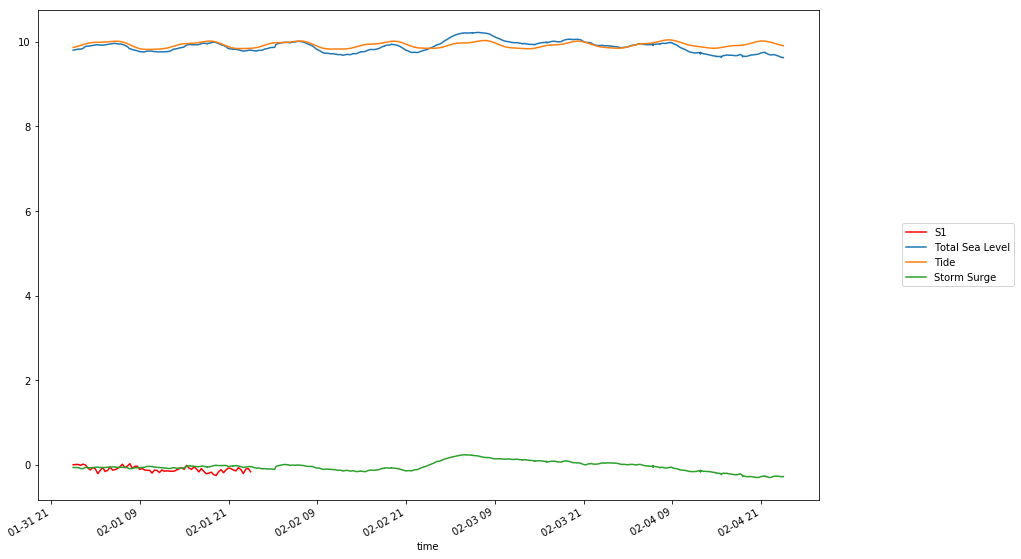

In [311]:
## Join the graphs
ax = ts.S1.plot(figsize=(14,10),color=['r'],label='d3d')
p.plot(ax=ax)
ax.legend(loc='center left',bbox_to_anchor=(1.1, 0.5))